Before we get into Poisson distributions and the processes they describe, we need to first introduce Gaussian distributions. The reason is that Poisson distributions are just a special type of Gaussian distribution. This is the equation for a Gaussian distribution:

$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

$\mu$ is the mean of the distribution

$\sigma$ is the standard deviation of the distribution

It's alright if equations aren't your thing. The thing to remember is that you have some distribution of your data and that there is a mean/average ($\mu$) and another parameter describing how spread out the distribution is---the standard deviation ($\sigma$). The following code allows us to play with those two parameters and see how it affects the Gaussian distribution. Go ahead and change 'mu' and 'sigma' and then push the "play" button to see how the distribution changes.

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'Gaussian distribution')]

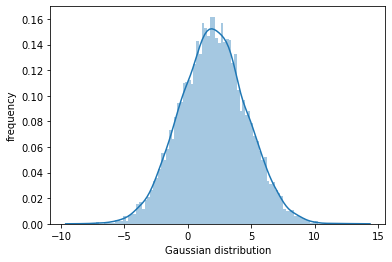

In [0]:
# Create inline plots
%matplotlib inline

# Matplotlib
import matplotlib.pyplot as plt

# Numpy module
import numpy as np

# Math module
import math

# Seaborn for visualizing distributions
import seaborn as sns

# A Poisson distribution is a special type of Gaussian distribution in which the
# mean and variance are equal. Many physical and biological phenomena are well-
# described by Poisson distributions.

# First, let's try to unpack the Poisson distribution a bit by making a generic
# Gaussian distribution with a mean (mu) and standard deviation (sigma). Choose
# whatever numbers you like.
mu = 2.0
sigma = 2.6

y = sigma * np.random.randn(1,10000) + mu

ax = sns.distplot(y, bins = 100);
ax.set(xlabel='Gaussian distribution', ylabel='frequency')



Go ahead and play around with the parameters for the Gaussian distribution. What you'll notice as you change the parameters, is that the values along the x-axis change, but the general, bell-curve, shape stays the same.

A Poisson distribution is just a special case in which the mean and variance are equal. The standard deviation ($\sigma$) is the square root of the variance and, since the mean and variance are equal, it is also the square root of the mean ($\mu$).

$\sigma = \sqrt{\mu}$

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'Poisson distribution')]

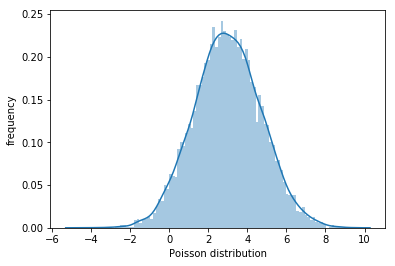

In [0]:
# Define a mean/variance.
mu = 3.0
# The standard deviation (sigma) is just the square root of this value.
sigma = math.sqrt(mu)

# 'randn' just generates a bunch of random numbers that have a Gaussian distribution
y = sigma * np.random.randn(1,10000) + mu

ax = sns.distplot(y, bins = 100);
ax.set(xlabel='Poisson distribution', ylabel='frequency')


All that's happened is that we've constrained the Gaussian distribution to have only one free parameter instead of two. Wasn't that easy?!

So, why did I make you learn this then? Well, it turns out that there are many physical processes that are well described with Poisson statistics. Here are a few examples that are relevant to you and me: 

1) In physics, the frequency of photon arrivals. This will become important very soon.

2) Neural spike counts (not exactly due to the refractory period)...

3) Frequency of vesicle release at synapses

Let's look at concrete example. Photon arrivals at a detector obey Poisson statistics so let's simulate a distribution of photon counts based on a mean values. Now, if we're talking about photon counts in, say, a 100 ms window, we aren't going to observe any counts that are less than zero, so we can clip the negative values out.

[Text(0, 0.5, 'number of bins'), Text(0.5, 0, 'spike count per bin')]

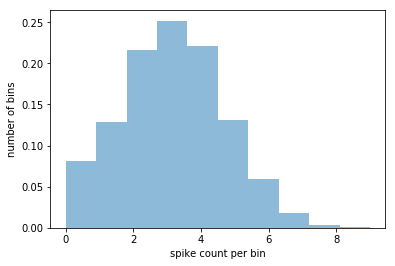

In [0]:
mu = 3.0
sigma = math.sqrt(mu)

y = sigma * np.random.randn(1,10000) + mu

# Photon counts are discrete (integers), so let's round.
y = np.round(y)

# We can't have negative photon counts, so set them to zero.
y[y < 0] = 0

ax = sns.distplot(y, bins = int(np.amax(y)+1.0), kde=False, norm_hist=True, hist_kws={"linewidth": 15, 'alpha':0.5});
ax.set(xlabel='photon count per bin', ylabel='number of bins')

That's all there is to it. We can see the probability (y-axis) that we observed x number of photons (x-axis). This type of visualization can be very helpful as we try to understand neural systems, etc. There are many examples of this, but for the time being I would like you to become comfortable with this concept. So, please play around with the code to familiarize yourself with how things change as we shift the parameters around.

OK. Now we want to look at cumulative distributions.

Text(0, 0.5, 'probability')

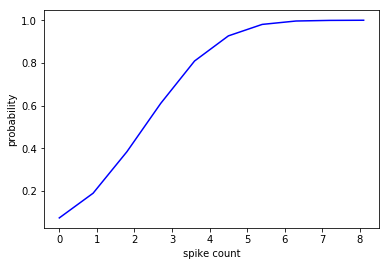

In [0]:
# Let's get the histogram
values, base = np.histogram(y, bins = int(np.amax(y)+1.0))

# Get the cumulative sum of the bins.
c = np.cumsum(values) / np.sum(values)

plt.plot(base[:-1], c, c='blue')
plt.xlabel('photon count')
plt.ylabel('probability')